In [ ]:
#Sample circuits
#visualization
#Providers, simulators and backends
#Choosing a backend
#transpilation
#qiskit_ibm_runtime,qiskit primitives samplerV2, estimatorV2 

In [4]:
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)


In [2]:
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile 

from qiskit.visualization import (
    plot_bloch_multivector, 
    plot_bloch_vector,
    plot_state_city,
    plot_histogram,
    plot_state_qsphere
)
from qiskit.quantum_info import Statevector

from qiskit_aer import AerSimulator, StatevectorSimulator, UnitarySimulator

# qiskit-ibmq-provider has been deprecated.
# Please see the Migration Guides in https://ibm.biz/provider_migration_guide for more detail.
from qiskit_ibm_runtime import QiskitRuntimeService 
from qiskit_ibm_runtime import EstimatorV2 as Estimator, SamplerV2 as Sampler
from qiskit_ibm_runtime import fake_provider


#### Qiskit Runtime Service with ibm-quantum channel

In [3]:
# IBM Quantum channel; set to default #https://docs.quantum.ibm.com/guides/setup-channel


with open('/Users/hema/feb_2022/QExperiments/QuantumComputing/my_ibmq_token.txt') as token_file:
    MY_IBM_QUANTUM_TOKEN = token_file.read()

# Save an IBM Quantum account and set it as your default account. # when working on a trusted local environment
QiskitRuntimeService.save_account(
    channel="ibm_quantum",
    token=MY_IBM_QUANTUM_TOKEN,
    set_as_default=True,
    # Use `overwrite=True` if you're updating your token.
    overwrite=True,
)

#or when working on a public environment
# service = QiskitRuntimeService(channel="ibm_quantum", token=MY_IBM_QUANTUM_TOKEN)
 
# # Load saved credentials
service = QiskitRuntimeService()

# service = QiskitRuntimeService(name='pinq2')

/var/folders/64/rp2jr10901n6vdvhsbn1fz7c0000gn/T/ipykernel_3029/377213024.py:20: DeprecationWarning: The "ibm_quantum" channel option is deprecated and will be sunset on 1 July. After this date, "ibm_cloud" and "local" will be the only valid channels. For information on migrating to the new IBM Quantum Platform on the "ibm_cloud" channel, review the migration guide https://quantum.cloud.ibm.com/docs/migration-guides/classic-iqp-to-cloud-iqp .
  service = QiskitRuntimeService()


#### Qiskit Runtime Service with ibm-cloud channel

In [ ]:
'''
url : https://quantum.cloud.ibm.com/
1. Create IBM Cloud API key
2. Create Instance

'''

with open('/Users/hema/feb_2022/QExperiments/QuantumComputing/my_ibmq_cloud_apikey.json') as token_file:
    IBM_CLOUD_API_KEY = token_file.read()

# IBM_CLOUD_API_KEY = '<ibm-cloud-api-key>'
QiskitRuntimeService.save_account(
    channel="ibm_cloud",
    token= IBM_CLOUD_API_KEY, 
    instance="qc_exp" ,
    overwrite=True,
    name='api_key_based'
)
service = QiskitRuntimeService()


#### Construct the hello world circuit

- quantum circuits — sequences of gates acting on qubits (unitary operators implemented as instructions on q regs)


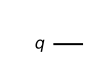

In [5]:

''' 1. Construct a quantum circuit with 1 qubit
    2. Draw the circuit
    3. Visualize with 
        i. blochsphere
        ii. state city plot
'''

qc = QuantumCircuit(1)
qc.draw()


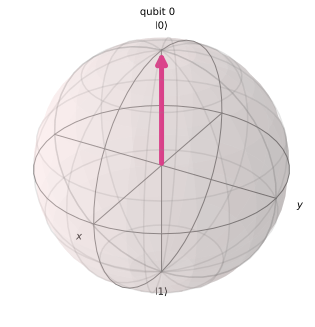

In [6]:
#visualize the circuit with plot_bloch_multivector
plot_bloch_multivector(qc)

#### 1-Qubit Gate - NOT gate (Bit Flip)

$$
X = \begin{bmatrix}
0 & 1\\
1 & 0
\end{bmatrix}
$$

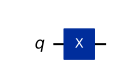

In [7]:
#Construct a simple circuit with not gate
qc = QuantumCircuit(1)
qc.x(0)
qc.draw()

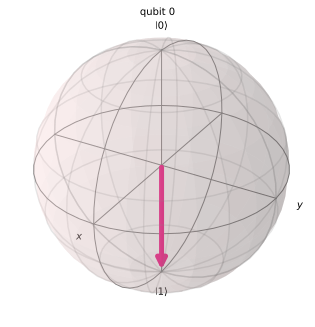

In [8]:
#visualize the circuit with plot_bloch_multivector
plot_bloch_multivector(qc)

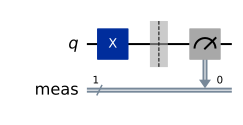

In [9]:
#apply measurement gate
qc.measure_all()
qc.draw()

#### Run the Circuit on a simulator

In [15]:
#run the circuit with the Aer simulator to get the probablity distribution of results
#by default, shots=1024

#create AerSimulator instance
simulator = AerSimulator()

#run the circuit on the simulator and get the result
result = simulator.run(qc, shots=10).result()
counts = result.get_counts()



In [13]:
counts

{'1': 10}

In [16]:
#print result
print(f'Backend Name: {result.backend_name}')
print(f'Backend version:{result.backend_version}')
print(f'Job ID: {result.job_id}')
print(f'Counts: {result.get_counts()}')

Backend Name: aer_simulator
Backend version:0.17.0
Job ID: 06b574ae-b250-4a1c-bbd3-090df61a4903
Counts: {'1': 10}


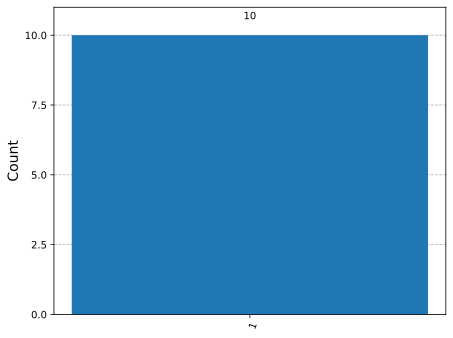

In [17]:
#get result counts and plot histogram to visualize distribution 
plot_histogram(counts)


##### Get the results of each shot

In [18]:
#Enable memory parameter to get results of every shot 
res = simulator.run(qc, shots=10, memory=True).result()
res.get_memory(qc)

['1', '1', '1', '1', '1', '1', '1', '1', '1', '1']

#### 2-Qubit Gate - CNOT gate

$$
CX = \begin{bmatrix}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 0 & 1\\
0 & 0 & 1 & 0\end{bmatrix}
$$

$$
\begin{align*}
|00\rangle &\rightarrow |00\rangle \\
|01\rangle &\rightarrow |01\rangle \\
|10\rangle &\rightarrow |11\rangle \\
|11\rangle &\rightarrow |10\rangle \\
\end{align*}
$$

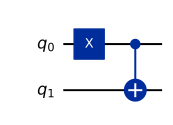

In [22]:
#Construct the circuit
qc = QuantumCircuit(2)

#apply not gate
qc.x(0)

#apply cnot gate
qc.cx(0,1)

#draw circuit
qc.draw()

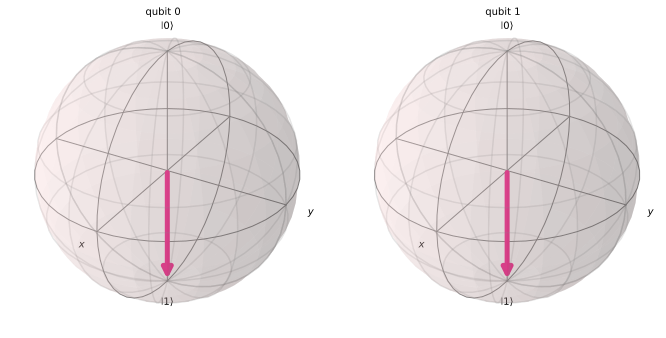

In [23]:
#blochsphere visualiaztion
plot_bloch_multivector(qc)

In [24]:
#apply measurementnt gate
qc.measure_all()

In [25]:
#Run the circuit, record the result and get counts
result = simulator.run(qc).result()
counts = result.get_counts()
counts

{'11': 1024}

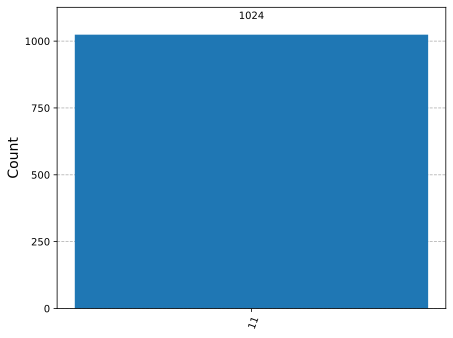

In [26]:
#plot histogram of the result counts
plot_histogram(counts)

#### Hadamard (Superposition)


$$
H = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}
$$

        H acts on basis states as:

$$
\begin{align*}
H|0\rangle &= \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle) = |+\rangle \\
H|1\rangle &= \frac{1}{\sqrt{2}}(|0\rangle - |1\rangle) = |-\rangle
\end{align*}
$$

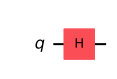

In [27]:
#Construct the circuit. 
qc = QuantumCircuit(1)

# Apply Hadamard gate to put qubit in a Superposition  state

qc.h(0)
qc.draw()



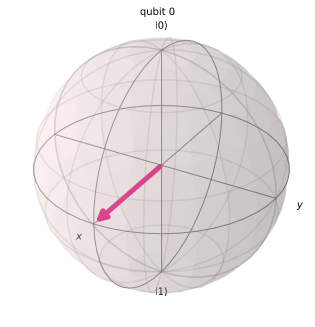

In [28]:
plot_bloch_multivector(qc)


In [29]:
#apply measurement gate 
qc.measure_all()

#Run the circuit, record the result and get counts
counts = simulator.run(qc).result().get_counts()

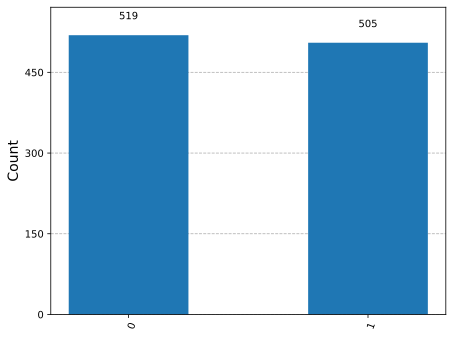

In [30]:
#plot histogram of the result counts
plot_histogram(counts)

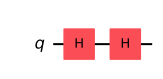

In [33]:
# apply H twice
qc = QuantumCircuit(1)
qc.h(0)
qc.h(0)
qc.draw()

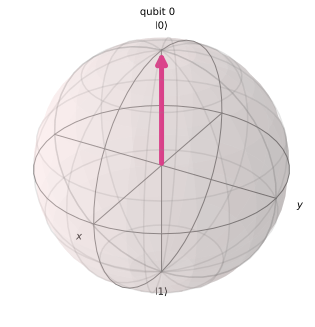

In [34]:
plot_bloch_multivector(qc)

#### Z gate (Phase Flip)


$$
Z = \begin{bmatrix}
1 & 0\\
0 & -1\end{bmatrix}
$$


$$
\begin{align*}
Z|0\rangle &= |0\rangle \\
Z|1\rangle &= -|1\rangle
\end{align*}
$$

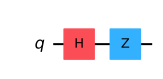

In [35]:
# create quantum circuit with 1 qubit
qc = QuantumCircuit(1)

# apply H gate

qc.h(0)
# Z gate #180 flip
qc.z(0)
 
#draw circuit

qc.draw()


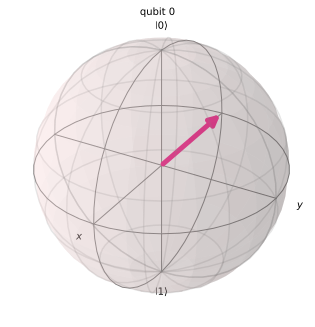

In [36]:
plot_bloch_multivector(qc)


#### Qsphere Visualization

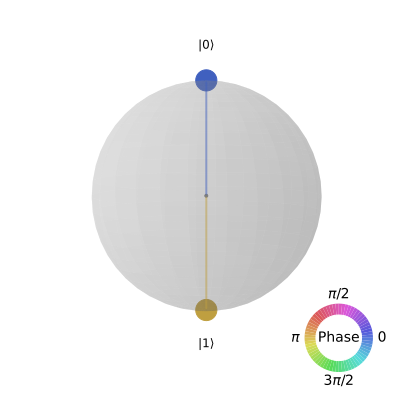

In [37]:
#Quick state visualization without executing the circuit - plot qsphere
plot_state_qsphere(qc)

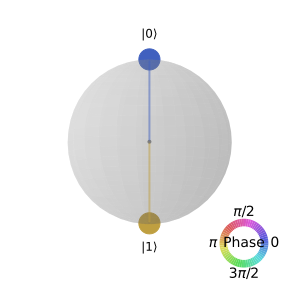

In [38]:
#Under the hood 
# Save statevector in case the SV should be manipulated/analyzed later
  
from qiskit.quantum_info import Statevector

#create quantum circuit with 1 qubit. Apply H, Z gates
qc = QuantumCircuit(1)
qc.h(0)
qc.z(0) #180 flip

#get the statevector from qc instruction set.
sv = Statevector.from_instruction(qc)

#plot qsphere
plot_state_qsphere(sv, figsize=(5,5))
# plot_bloch_multivector(qc)


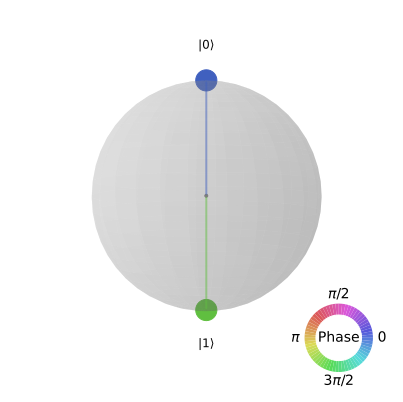

In [39]:
#manipulate the saved state vector directly if required
import numpy as np
sv.data[1] *= np.exp(np.pi/3 * 1j)
plot_state_qsphere(sv)

In [44]:
## Construct quantum circuit without measure, save the statevector, run the circuit and visualize plot_state_qsphere

# create aer state vector (SV) simlator instance
sim = AerSimulator(method='statevector')

#create quantum circuit
qc = QuantumCircuit(1)
qc.h(0)
qc.z(0)
qc.x(0)
qc.s(0) #introduce rel phase (imaginary amp)


#save the circuit statevector
qc.save_statevector()

#run the circuit with SV simulator
res = sim.run(qc).result()

#get SV from the result and plot qsphere
sv = res.get_statevector(qc)
# plot_state_qsphere(sv)



#### State city plot

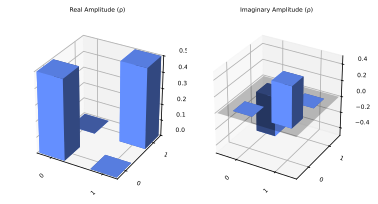

In [45]:
# #visualize the relative phase between components of the Q s/m
plot_state_city(sv , figsize=(5,5))

#### Bell State (Entanglement)

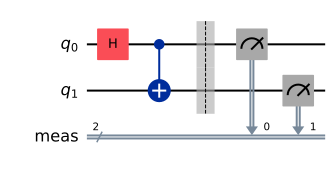

In [47]:
#Construct the circuit with 2 qubits.
qc = QuantumCircuit(2)
#apply H gate
qc.h(0)
#apply cnot
qc.cx(0,1)
#apply measurement
qc.measure_all()

qc.draw()

In [48]:
#Run the circuit, record the result and get counts
counts = simulator.run(qc).result().get_counts()
counts

{'00': 468, '11': 556}

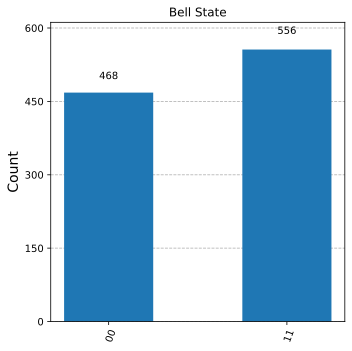

In [49]:
#plot histogram of the result counts- compare with the above 2 qubits in superposition
plot_histogram(counts, figsize=(5,5), title='Bell State')

#### Circuit execution on a backend noise model

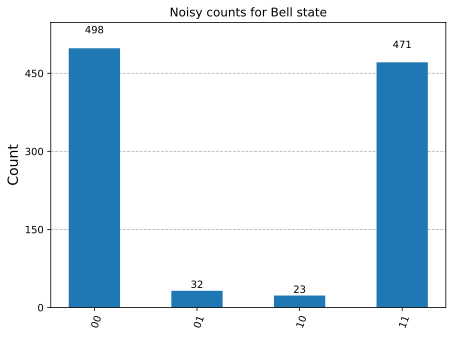

In [50]:
from qiskit_ibm_runtime.fake_provider import FakeAlmadenV2
device_backend = FakeAlmadenV2()
noisy_sim = AerSimulator.from_backend(device_backend)


result = noisy_sim.run(transpile(qc, noisy_sim)).result()
counts = result.get_counts(0)
plot_histogram(counts, title='Noisy counts for Bell state')


#### Circuit execution on a real quantum computer

In [51]:
#get backends that is least busy / most available

n_qubits = 20
backend = service.least_busy(
    operational=True, simulator=False, min_num_qubits=n_qubits
)
backend

<IBMBackend('ibm_sherbrooke')>

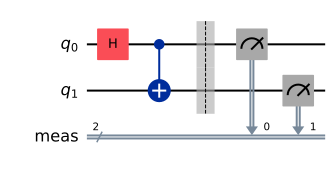

In [52]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
qc.measure_all()
qc.draw()

#### Qiskit Primitives - Sampler and Estimator

- Sampler : The Sampler is used to execute a quantum circuit multiple times (with diffferent parameter values) and returns probability distribution of measurement outcomes (raw measurement outcomes) 
- Estimator : Returns the expectation value of a given observable. Eg: Evaluating cost functions in quantum optimization or machine learning

In [53]:
from qiskit_ibm_runtime import SamplerV2 as Sampler

#create sampler instance for the backend
sampler = Sampler(backend)

#run sampler for the circuit
job = sampler.run([qc])

#get job id so the job can be tracked later
print(f"job id: {job.job_id()}")




IBMInputValueError: 'The instruction h on qubits (0,) is not supported by the target system. Circuits that do not match the target hardware definition are no longer supported after March 4, 2024. See the transpilation documentation (https://docs.quantum.ibm.com/guides/transpile) for instructions to transform circuits and the primitive examples (https://docs.quantum.ibm.com/guides/primitives-examples) to see this coupled with operator transformations.'

In [54]:
#check gates implemented in target backends

print(list(backend.target.operation_names))
# plot_gate_map(backend, figsize=(7, 7), font_size=14)

['if_else', 'measure', 'sx', 'for_loop', 'rz', 'x', 'reset', 'delay', 'id', 'ecr', 'switch_case']


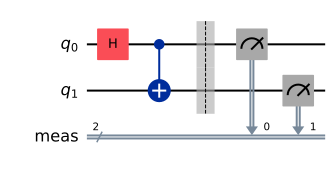

In [58]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
qc.measure_all()
qc.draw()

job id: d15h9r7qf56g0081zjvg


/Users/hema/environments/qubo-qutting/lib/python3.12/site-packages/qiskit_ibm_runtime/qiskit_runtime_service.py:876: UserWarning: IBM Quantum Platform is moving, and this version will be sunset on July 1. To get started on the new platform, read the migration guide at https://docs.quantum.ibm.com/migration-guides/classic-iqp-to-cloud-iqp
  warnings.warn(warning_message)


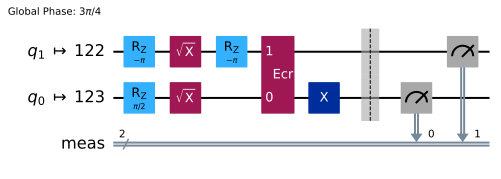

In [59]:
#transpile the circuit for the specific backend
sampler = Sampler(backend)



#transpile cicuit
transpiled_qc = transpile(qc,backend=backend)

# execute the transpiled circuit
job = sampler.run([transpiled_qc])
print(f"job id: {job.job_id()}")

transpiled_qc.draw()


In [60]:
#check job status
job.status()

'QUEUED'

In [61]:
#get the result of a completed job - CHeck https://quantum.ibm.com/workloads to get the list of all jobs run so far
job = service.job('cy9zqjynrmz000861qq0')
job_result = job.result()
job_result

PrimitiveResult([SamplerPubResult(data=DataBin(c=BitArray(<shape=(), num_shots=4096, num_bits=2>), meas=BitArray(<shape=(), num_shots=4096, num_bits=2>)), metadata={'circuit_metadata': {}})], metadata={'execution': {'execution_spans': ExecutionSpans([SliceSpan(<start='2025-01-24 20:45:02', stop='2025-01-24 20:45:19', size=4096>)])}, 'version': 2})

In [63]:
#pub_result = job_result[<idx>].data.<classical register>.get_counts()
job_result[0].data.meas.get_counts()

{'00': 1996, '11': 2036, '10': 38, '01': 26}

In [62]:
#get classical registers
qc.cregs 

[ClassicalRegister(2, 'meas')]

#### Estimator

In [147]:
from qiskit_ibm_runtime import EstimatorV2 as estimator
from qiskit.circuit.random import random_circuit
from qiskit.quantum_info import SparsePauliOp

simulator = AerSimulator()

estimator = estimator(simulator)
circuit = random_circuit(2, 2, seed=0).decompose(reps=1)
observable = SparsePauliOp("XZ")

job = estimator.run([(circuit, observable)])
result = job.result()

# display(circuit.draw("mpl"))
# print(f"Observable: {observable.paulis}")
# print(f"Expectation value: {result[0].data.evs}")

In [149]:
from qiskit.circuit.library import RealAmplitudes

circuit = RealAmplitudes(num_qubits=2, reps=2).decompose(reps=1)
observable = SparsePauliOp("ZI")
parameter_values = [0, 1, 2, 3, 4, 5]

job = estimator.run([(circuit, observable, parameter_values)])
result = job.result()

# display(circuit.draw("mpl"))
# print(f"Observable: {observable.paulis}")
# print(f"Parameter values: {parameter_values}")
# print(f"Expectation value: {result[0].data.evs}")

#### Transpile with pass manager

In [150]:
#Transpile with pass manager

from qiskit.transpiler import generate_preset_pass_manager
 
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1) 
# Convert to an ISA circuit and layout-mapped observables.
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_circuit = pm.run(qc)
 
# isa_circuit.draw("mpl", idle_wires=False)


#### Run clifford circuits on clifford simulator

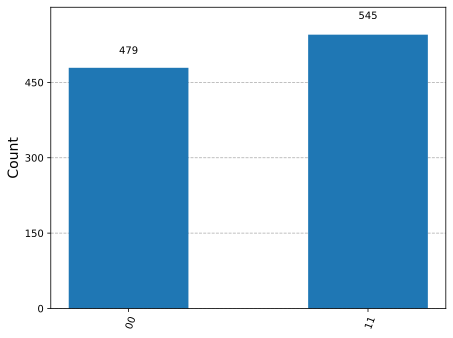

In [ ]:

sim = AerSimulator(method='stabilizer')

qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
qc.measure_all()
counts = sim.run(qc).result().get_counts()
plot_histogram(counts)